![image.png](https://images.unsplash.com/photo-1534862262637-373c120dcbcc?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=967&q=80)
*Photo by <a href="https://unsplash.com/@jimgade?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">jim gade</a> on <a href="/s/photos/natural-disasters?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>*
  

# Natural Disasters 1900-2021: An EDA

## List of Worldwide Natural Disasters by EM-DAT Database

> "*EM-DAT contains essential core data on the occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.*"
[“EM-DAT, CRED / UCLouvain, Brussels, Belgium – www.emdat.be (D. Guha-Sapir)”*"](https://www.kaggle.com/kaggle-survey-2020).

This notebook explores EM-DAT data extracted from [www.emdat.be](http://www.emdat.be). The data being analysed takes into account all continents, and presents details regarding natural disasters from 1900 to currrent date. 


## <center style="background-color:Gainsboro; width:40%;">Contents</center>
1. [Overview](#1.-Overview)<br>
1.1. [Content](#3.1.-Content)<br>
1.2. [Acknowledgements](#3.2.-Acknowledgements)<br>
2. [Key Insights](#2.-Key-Insights)<br>
3. [The Data](#3.-The-Data)<br>
3.1 [Natural Disasters in Numbers](#3.1-Natural-Disasters-in-Numbers)<br>
3.2. [Natural Disasters Casualties and Affected](#3.2-Natural-Disasters-Casualties-and-Affected)<br>
4. [Natural Disasters Around the World](#4.-Natural-Disasters-Around-the-World)
6. [Conclusion](#6.-Conclusion)<br>

*Please remember to upvote if you find this Notebook helpful!*

# **1. Overview**

In 1988, the Centre for Research on the Epidemiology of Disasters (CRED) launched the Emergency Events Database (EM-DAT). EM-DAT was created with the initial support of the World Health Organisation (WHO) and the Belgian Government.

The main objective of the database is to serve the purposes of humanitarian action at national and international levels. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.

EM-DAT contains essential core data on the occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.

## 1.1. Content ##

The current data was obtained by querying the EM-DAT database on 4th March 2021. Only Natural Disasters were considered, excluding Technological and Complex Disasters options. All locations of the world were also enabled. The time period starts in 1900 to the current year, 2021.

For an event to be registered into the EM-DAT database it must fulfill one of three entry criteria:

* **Deaths**: 10 or more people deaths

* **Affected**: 100 or more people affected/injured/homeless.

* **Declaration/international appeal**: Declaration by the country of a state of emergency and/or an appeal for international assistance
    

## 1.1. Acknowledgements ##

I cannot make this dataset public as I am not the one creating or mantaining it. It can be downloaded in the link below.

The credit for creating and maintaining the Database is for the Centre for Research on the Epidemiology of Disasters - CRED and the School of Public Health from the Université catholique de Louvain.

“EM-DAT, CRED / UCLouvain, Brussels, Belgium – www.emdat.be (D. Guha-Sapir)”

# **2. Key Insights**

* The number of Natural Disasters recorded has increased over the years. While the EM-DAT has started collecting data officially from 1988, we see a proeminent upward trend starting in the 60's and seems to reach a peak in the 00's, and continue to vary around this peak to this day
* In total, the number of disasters seem to have stabilised, however, there seems to be a trend that every two or three years there is a sharp rise 
* Metereological (e.g. Storms) and Hydrological (e.g. Floods) are the most commonly occurring types of disasters, followed by Geophysical (e.g. Volcanic Activity), Biological (e.g. Epidemic) and Climatological (e.g. Drought)
* Climatological events have taken more lives than any other type of Natural Disasters, followed by Hydrological events
* Hydrological events are the ones who affect most people
* Floods (Hydro), Storms (Meteo) and Earthquakes (Geo) are the Disasters Subtypes that occurred the most since 1900. In total, 5.400 Floods, 4.400 Storms and 1.500 have been recorded since then.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
import datetime

import os

In [2]:
nd = pd.read_csv('../input/emdat19002021/EMDAT_1900-2021_NatDis.csv')

In [3]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):

    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

def heatmap(df, index,columns,values,vmax,Title):
    DisasterDuration_wide = df.pivot(index=index, columns=columns, values=values)
    #DisasterDuration_wide = DisasterDuration_wide.sort_values(by = sort_by, ascending = False)#ignore_index = True)

    plt.figure(figsize=(12,8))

    ax = sns.heatmap(DisasterDuration_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_title(Title,fontsize = 12,weight = 'bold',pad=20)
    plt.show()
    
def histplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x)
    plt.xticks(rotation=70,fontsize = 8)
    ax.set_xlabel(x_axis_title)
    ax.set_ylabel(y_axys_title)
    plt.title(plot_title, fontsize = 12,weight = 'bold')    

def bar_plot(x,y,xlabel,ylabel,title, label):
    plt.figure(figsize=(20,5))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.barplot(x=x, y = y, palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=90,fontsize = 12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    
    if label == 'percent':
        for p in ax.patches:
                     ax.annotate("%.1f%%" % (100*float(p.get_height()/15827)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                         ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'vertical',
                         textcoords='offset points')
    if label == 'number':
        for p in ax.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                 ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
                 textcoords='offset points')
    

def Null_Analysis(df,title):
    null_columns=df.columns[df.isnull().any()]
    null_columns_plot = df[null_columns].isnull().sum().sort_values(ascending = False)
    bar_plot(null_columns_plot.index, null_columns_plot,"Features", "Number of Null Values", title, 'percent')

# **3. The Data**

As mentioned above, the data has been downloaded from the EM-DAT website using their query service. In this section we perform an initial exploration to understand the features, missing values and general characteristics of the data.

It is an interesting dataset. From the outputs below we understand that it contains a considerable amount of features, where we can extract a lot of information regarding one single event. Notice it contains numerical and categorical features as well as several Null entries. The Null entries are somewhat expected since it must be difficult to collect perfect data regarding all events.

In [4]:
basic_EDA(nd)

Number of Samples: 15827,
Number of Features: 43,
Duplicated Entries: 0,
Null Entries: 285923,
Number of Rows with Null Entries: 15827 100.0%


The summary below is helpful to give an overview of our features. The table below explains which features are categorical, which ones are numerical and we start to see a pattern of the missing values. As the feature become more specific to an event, such as cost or Local Time, more missing values are present. 

In [5]:
summary_table(nd)

,Name,dtypes,Missing,Uniques
0,Dis No,object,0,15827
1,Year,int64,0,122
2,Seq,int64,0,1266
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,2984,27
7,Disaster Subsubtype,object,14782,12
8,Event Name,object,12024,1532
9,Entry Criteria,object,335,13


The graph below is a more friendly way to display the number of missing values by feature. While there are attributes with almost 100% of missing values, the most crucial information regarding the events have relatively low missing values or no missing values. 

Disaster location, number of casualties, and dates are the most relevant features, and they display a lower value of missing entries. If such features had a higher number of missing values it would be necessary to ignore such samples or to use some kind of imputation method, which could reduce the representativeness of the dataset.

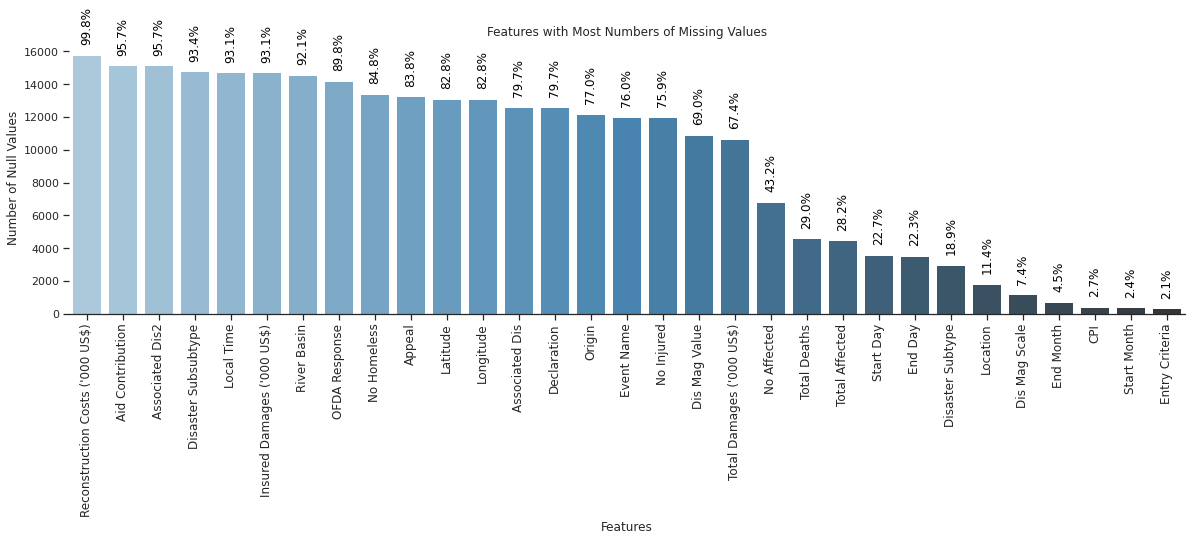

In [6]:
Null_Analysis(nd,'Features with Most Numbers of Missing Values')

The table below is an extraction of the DataFrame, and explains the hierarchy used by EM-DAT to organize the events. As shown by the above plot, Disaster Subtype and Subsubtype are not present for all samples and have been replaced with a "-" for demonstration. 

**Am I the only one bothered by the fact that there is an EXTRA-TERRESTRIAL category??? Just kidding, this is just for meteor impacts...right?**

In [7]:
info_subgroups = nd.loc[:,['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']]

values = {'Disaster Subtype': '-', 'Disaster Subsubtype': '-'}
info_subgroups = info_subgroups.fillna(value=values)

data_subgroups = pd.DataFrame(info_subgroups.groupby(['Disaster Subgroup','Disaster Type','Disaster Subtype','Disaster Subsubtype']).size().to_frame('Count'))
data_subgroups.iloc[:,:-1]

Empty DataFrame
Columns: []
Index: [(Biological, Animal accident, -, -), (Biological, Epidemic, -, -), (Biological, Epidemic, Bacterial disease, -), (Biological, Epidemic, Parasitic disease, -), (Biological, Epidemic, Viral disease, -), (Biological, Insect infestation, -, -), (Biological, Insect infestation, Grasshopper, -), (Biological, Insect infestation, Locust, -), (Climatological, Drought, -, -), (Climatological, Drought, Drought, -), (Climatological, Glacial lake outburst, -, -), (Climatological, Wildfire, -, -), (Climatological, Wildfire, Forest fire, -), (Climatological, Wildfire, Land fire (Brush, Bush, Pasture), -), (Extra-terrestrial, Impact, -, -), (Geophysical, Earthquake, -, -), (Geophysical, Earthquake, Ground movement, -), (Geophysical, Earthquake, Tsunami, -), (Geophysical, Mass movement (dry), -, -), (Geophysical, Mass movement (dry), Avalanche, -), (Geophysical, Mass movement (dry), Landslide, -), (Geophysical, Mass movement (dry), Landslide, Mudslide), (Geophysical, Mass movement (dry), Rockfall, -), (Geophysical, Mass movement (dry), Subsidence, Sudden subsidence), (Geophysical, Volcanic activity, -, -), (Geophysical, Volcanic activity, Ash fall, -), (Geophysical, Volcanic activity, Lava flow, -), (Geophysical, Volcanic activity, Pyroclastic flow, -), (Hydrological, Flood, -, -), (Hydrological, Flood, Coastal flood, -), (Hydrological, Flood, Flash flood, -), (Hydrological, Flood, Riverine flood, -), (Hydrological, Landslide, -, -), (Hydrological, Landslide, Avalanche, -), (Hydrological, Landslide, Avalanche, Winter storm/Blizzard), (Hydrological, Landslide, Landslide, -), (Hydrological, Landslide, Mudslide, -), (Hydrological, Landslide, Rockfall, -), (Hydrological, Landslide, Subsidence, Sudden subsidence), (Meteorological, Extreme temperature, Cold wave, -), (Meteorological, Extreme temperature, Heat wave, -), (Meteorological, Extreme temperature, Severe winter conditions, -), (Meteorological, Extreme temperature, Severe winter conditions, Snow/Ice), (Meteorological, Fog, -, -), (Meteorological, Storm, -, -), (Meteorological, Storm, Convective storm, -), (Meteorological, Storm, Convective storm, Derecho), (Meteorological, Storm, Convective storm, Hail), (Meteorological, Storm, Convective storm, Lightning/Thunderstorms), (Meteorological, Storm, Convective storm, Rain), (Meteorological, Storm, Convective storm, Sand/Dust storm), (Meteorological, Storm, Convective storm, Severe storm), (Meteorological, Storm, Convective storm, Storm/Surge), (Meteorological, Storm, Convective storm, Tornado), (Meteorological, Storm, Convective storm, Winter storm/Blizzard), (Meteorological, Storm, Extra-tropical storm, -), (Meteorological, Storm, Tropical cyclone, -)]

## 3.1. Natural Disasters in Numbers##

In this section we aim to answer what is most common, the most critical, and have a better insight on the magnitude Natural Disasters consequences in a worldwide view.

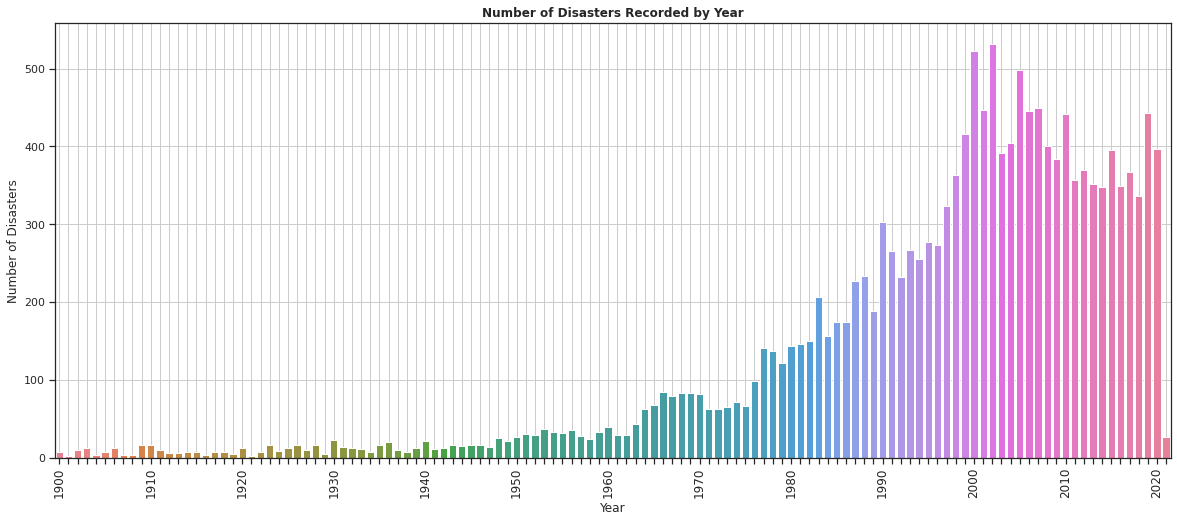

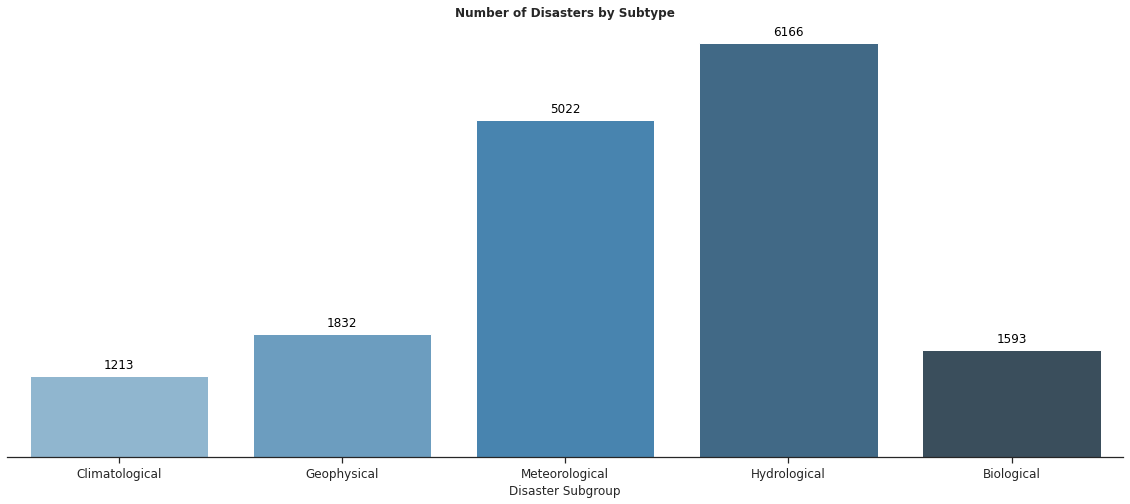

In [8]:
nd_general = nd.loc[:,['Year','Disaster Subgroup','Disaster Type','Total Deaths','Total Affected']]
nd_general = nd_general[nd_general['Disaster Subgroup'] != 'Extra-terrestrial']

#Plot 'Number of Disasters Recorded by Year'
plt.figure(figsize=(20,8))
ax = sns.countplot(data = nd_general,x='Year', palette = 'husl')
plt.xticks(rotation=90,fontsize = 12)
ax.grid()
#Avoid ticks to crowd the X axis
for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
plt.title('Number of Disasters Recorded by Year', fontsize = 12,weight = 'bold');    

# Plot 'Number of Disasters by Subtype'
plt.figure(figsize=(20,8))
ax = sns.countplot(data = nd_general,x='Disaster Subgroup', palette = 'Blues_d')

for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')

ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)         
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Disaster Subgroup')
ax.set_ylabel('Number of Disasters')
plt.title('Number of Disasters by Subtype', fontsize = 12,weight = 'bold');  

* The number of records of Natural Disasters has increased over the years, mostly due to advances in technology, communication and ease of data collection
* The yearly quantity of Natural Disasters rise upto the year 2000. For the last 10 years, the total number seems to fluctuate around 350 - 400 Natural Disaster per Year
* Between 2000 and 2010 it has been a period where the total number of Natural Disaster were higher. During that decade, most years have recorded near 400 disasters and surpassed 500 events in 2000 and 2002
* Natural Disaster are classified into five classes (excluding extra-terrestrial). The most common type of disaster are from Hydrological nature, followed by Metereological. Together the two classes of disaster account for more than 70% of all cases


In [9]:
#Separate in Numerical and Categorical Variables
numeric_data = nd.select_dtypes(include=[np.number])
numeric_features = numeric_data.columns

categorical_data = nd.select_dtypes(exclude=[np.number])
categorical_features = categorical_data.columns

The next graph analyses the number of Natural Disasters in the last ten years in more detail.

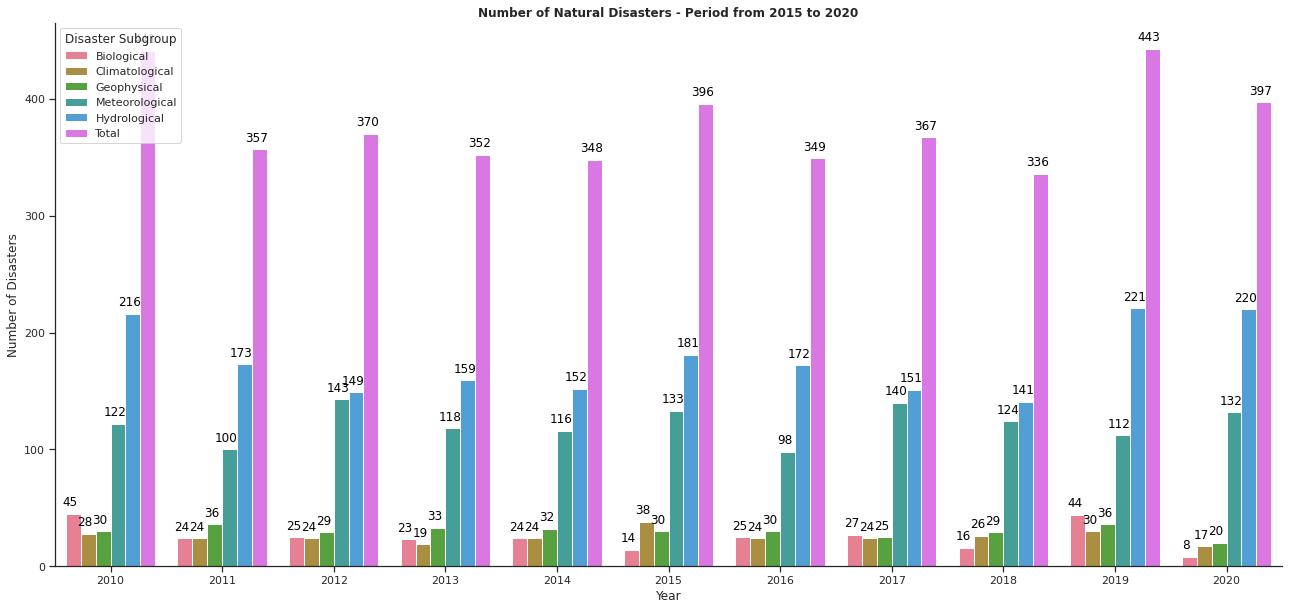

In [10]:
rec_dis = nd_general[(nd_general['Year'] >= 2010) & (nd_general['Year'] <= 2020)]
rec_dis = rec_dis.groupby(['Disaster Subgroup','Year']).size().reset_index(name="Count")

total = rec_dis.groupby(['Year']).sum().reset_index()
total['Disaster Subgroup'] = list(['Total']*11)
total = total.loc[:,['Disaster Subgroup','Year','Count']]

rec_dis = rec_dis.append(total, ignore_index = True)

plt.figure(figsize=(22,10))

ax = sns.barplot(data=rec_dis, x='Year', y = 'Count',hue ='Disaster Subgroup', 
                 hue_order = ['Biological', 'Climatological', 'Geophysical','Meteorological','Hydrological','Total'],
                 palette = "husl")

for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')

sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
plt.title("Number of Natural Disasters - Period from 2015 to 2020", fontsize = 12,weight = 'bold');

* In the last ten years the total number of Natural Disasters has ranged from 336 to 443, with a mean of 377
* The distribution of Disaster Subtypes follows a similar trend if compared to the previous graph. Hydrological and Metereological are dominant across all years
* In 2015 there was a higher incidence than usual of Geophysical events. That year, it was recorded 23 earthquakes, 6 volcanic activities and 1 mass movement
* Biological events had a sudden rise in 2010 and 2019, displaying double the amount of records compared to other years of the same decade. Biological events are divided into Epidemic or Insect Infestation. A rise in Epidemic records  (44 - 2010 / 36 - 2019) is behind this peak. It is surprising that the same trend has not repeated in 2020. In addition, 2019 also had 8 Insect Infestation events that contributed to this total
* 2019 and 2010 were also the years with a higher number of Natural Disasters in total, with 443 and 441 respectively. Both years present a higher number than usual of Biological, and Hydrological events. Floods and Epidemic were the disasters that had a higher incidence than usual for both years

So far we have seen that Metereological and Hydrological events are the most common, but within this general classification of events there are ramifications. The bar chart below illustrates how the Natural Disasters subtypes are distributed. The analysis considers all the events since 1900.

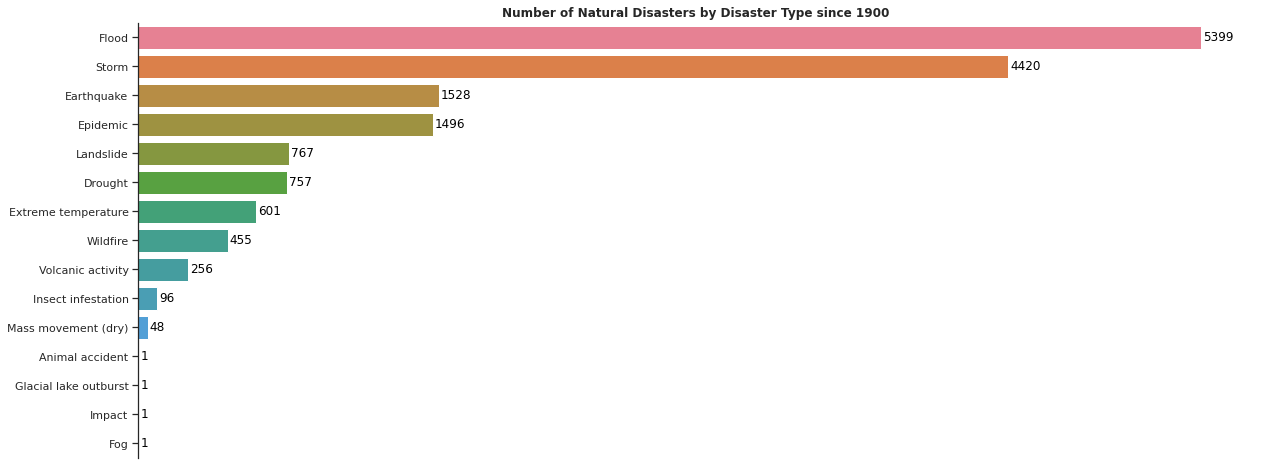

In [11]:
graph_subgroups = info_subgroups.groupby(['Disaster Subgroup','Disaster Type']).size().to_frame('Count').reset_index()
graph_subgroups.sort_values('Count',ascending=False, inplace=True)

plt.figure(figsize=(20,8))

ax = sns.barplot(data=graph_subgroups, x='Count', y = 'Disaster Type', ci=None, palette = 'husl')

for p in ax.patches:
        width = int(p.get_width())
        ax.annotate("%d" % p.get_width(), (width, p.get_y() + p.get_height()/ 2),
        ha='left', va='center', color='black', xytext=(2, 0),rotation = 'horizontal',textcoords='offset points')
        

sns.despine(top=True, right=True, left=False, bottom=True)
ax.set_xlabel('Number of Occurrences')
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.axes.get_xaxis().set_visible(False) 

plt.title("Number of Natural Disasters by Disaster Type since 1900", fontsize = 12,weight = 'bold');

* As expected, Hydrological and Metereological events are within the top two most common Natural Disasters. The EM-DAT has a record of 5399 floods since 1900 and 4420 Storms. These two events accounts for 60% of all events in the Database
* It is interesting that Earthquakes are almost as "common" as Epidemic disasters. Before Covid we did not hear that much about Epidemic cases. One reason could be that more serioues Epidemies happened several years ago. Another reason could be that Epidemy currently happens in places of extreme poverty, and there is not much media to bring awareness. When we analyse Disaster by Country some of these questions could be answered

Note to self: **Create a graph to visualise the number of natural disasters subtypes by year**

## 3.2. Natural Disasters Casualties and Affected##

We can perceive some Natural Disasters are demonstrations of the powerful force of Nature. While sometimes beatiful, it can also be fatal, affecting not only our physical body but also leaving mental health issues to whoever survived and had to cope with tragic events. 

In this section we analyse in more depth the Number of Fatalities and Total Number of Affected people for each disaster type. On this analysis, only the Total Affected is taken into account as it aggregates all the people who were injured or made homeless due to the disaster occurrence.

* **No Affected**: People requiring immediate assistance during an emergency situation. 
* **No Homeless**: Number of people whose house is destroyed or heavily damaged and therefore need shelter after an event.
* **Total affected**: The total affected is the sum of injured, affected and homeless

> *Note on Number of Affected, Number of Homeless and Total Affected ([source EM-DAT](https://public.emdat.be/about)*)

The linear plot below shows the cumulative sum of Deaths (left) and Affected People (right) since 1900.

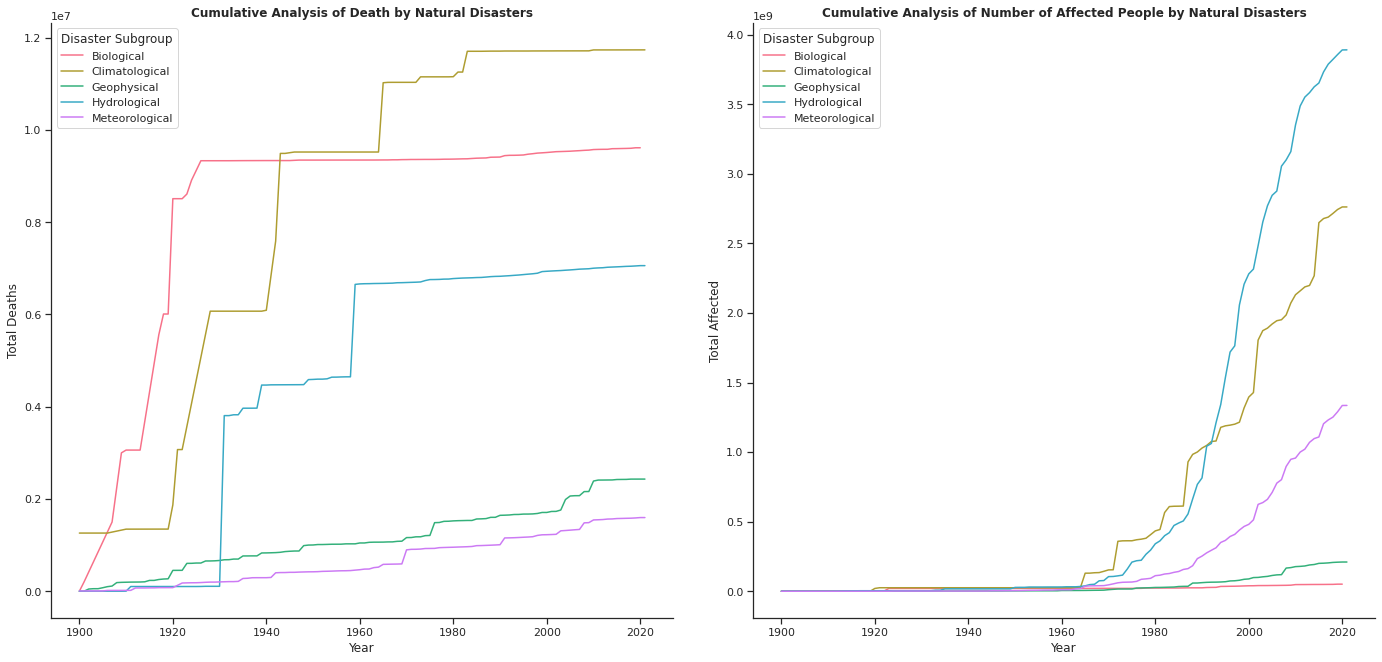

In [12]:
death_cumsum = nd_general.groupby(['Disaster Subgroup','Year']).sum()\
                .groupby(['Disaster Subgroup']).cumsum().reset_index()

fig, axarr = plt.subplots(1, 2, figsize=(20, 10))
sns.despine(top=True, right=True, left=False, bottom=False)

sns.lineplot(x = 'Year', y = 'Total Deaths', hue='Disaster Subgroup',data=death_cumsum, palette = "husl", ax = axarr[0])
sns.lineplot(x = 'Year', y = 'Total Affected', hue='Disaster Subgroup',data=death_cumsum, palette = "husl", ax = axarr[1])

axarr[0].set_title("Cumulative Analysis of Death by Natural Disasters",fontsize = 12,weight = 'bold')
axarr[1].set_title("Cumulative Analysis of Number of Affected People by Natural Disasters",fontsize = 12,weight = 'bold')
fig.tight_layout(pad=3.0)  
plt.show()

* The two features show a very distinct pattern. While the fatalities increase in a more stepwise manner, the number of affected people displays an exponential growth
* The steps we see in the Number of Deaths could be related to specific events. However, it is interesting to note that after 1960 - 1980 all events seem to rise more linearly. As such, the steps could be also related to difficulties in data collection
* Looking at the Number of Casualties for Biological disasters, between 1900 - 1920 there is a sharp rise and the stabilise in a linear pattern
* Metereological and Geophysical events are the only ones that have a more linear pattern from the early 1900. One reason could be that earthquakes and severe storms were more commonly tracked by the Government and other Institutions early on. In addition, extreme floods or draughts do not happen every year, as such these large jumps in the graph appear as a consequence


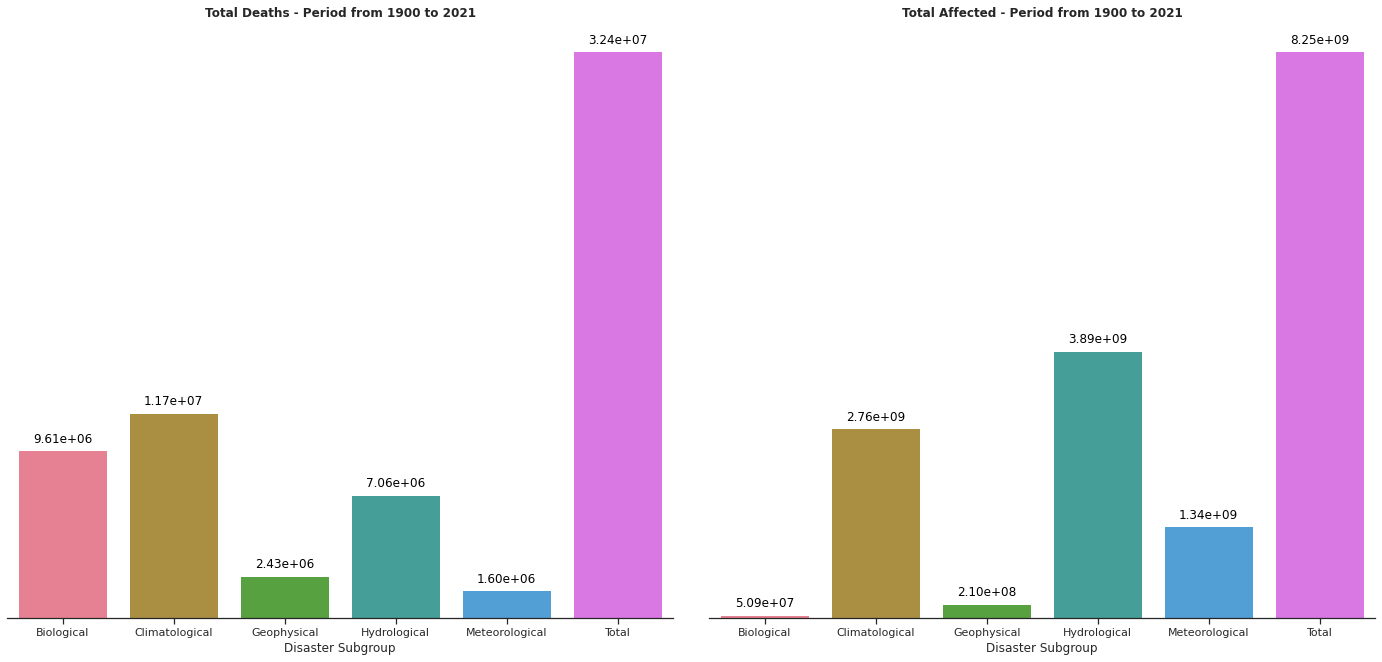

In [13]:
nd_deaths = nd_general.loc[:,['Disaster Subgroup','Total Deaths','Total Affected']]
nd_deaths = nd_deaths.groupby(['Disaster Subgroup']).sum().reset_index()

nd_deaths['Death%'] = 100*(nd_deaths['Total Deaths'].div(nd_deaths['Total Deaths'].sum()))
nd_deaths['Affected%'] = 100*(nd_deaths['Total Affected'].div(nd_deaths['Total Affected'].sum()))
total_row = {'Disaster Subgroup':'Total',
             'Total Deaths':nd_deaths['Total Deaths'].sum(), 
             'Total Affected':nd_deaths['Total Affected'].sum()}

nd_deaths = nd_deaths.append(total_row,ignore_index=True)
nd_deaths['DeathRatio'] = nd_deaths['Total Deaths'].div(nd_deaths['Total Affected'])

fig, axarr = plt.subplots(1, 2, figsize=(20, 10))

sns.despine(top=True, right=True, left=True, bottom=False)

dfs = list(['Total Deaths','Total Affected'])
z = 0

for i in dfs:
    ax = sns.barplot(data=nd_deaths, x='Disaster Subgroup', y = i ,ax=axarr[z], palette = "husl")
    
    for p in ax.patches:
        ax.annotate("%s" % ("{:.2e}".format(p.get_height())), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')

    axarr[z].set(yticklabels=[])
    axarr[z].axes.get_yaxis().set_visible(False) 
    axarr[z].set_title(i + " - Period from 1900 to 2021",fontsize = 12,weight = 'bold')
    z +=1

fig.tight_layout(pad=3.0)    
plt.show()

* One can understand why Hydrological events have a higher Number of Affected people. A river that floods can impact a whole community and leave thousands homeless in a short period of time. Considering that the top 10 biggest citis of the world are near the coast, it is a problem that must be addressed to avoid major consequences in the future
* The analysis also shows that Climatological events are a dangerous threat as they combine a high number of deaths and a significant number of affected pepople, being only behind Hydrological events
* Biological events have a proportionaly limited participation when considering the Number of Affected (right). However, considering Number of Deaths it is only behind Climatological events (left). Even though currently this is a sensitive topic, it is a fair analysis to conclude that epidemics are extremly dangerous, since they have a higher Death/Affected ratio than other Natural Disasters

The graph below displays the Death per Affected People ratio of each Natural Disaster. As presumed, Biological disasters have a higher indice than any other. While a Geophysical event kills 1 (1.16%) when 100 people are affected, Biological events have killed 18 (18.88%) for every 100 people affected.

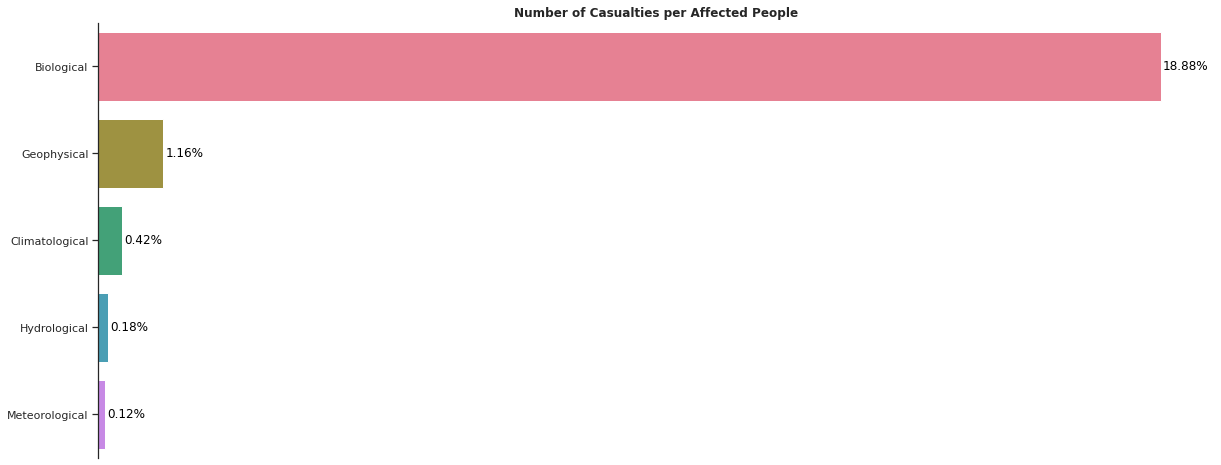

In [14]:
nd_deaths = nd_deaths.sort_values(by = 'DeathRatio', ascending = False)

plt.figure(figsize=(20,8))
ax = sns.barplot(data=nd_deaths, x='DeathRatio', y = 'Disaster Subgroup',  palette = 'husl',order=['Biological', 'Geophysical','Climatological', 'Hydrological','Meteorological'])

for p in ax.patches:
        width = int(p.get_width())
        ax.annotate("%.2f%%" % (p.get_width()*100), (p.get_width(), p.get_y() + p.get_height()/ 2),
        ha='left', va='center', color='black', xytext=(2, 0),rotation = 'horizontal',textcoords='offset points')
        

sns.despine(top=True, right=True, left=False, bottom=True)
ax.set_xlabel('Number of Occurrences')
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.axes.get_xaxis().set_visible(False) 

plt.title("Number of Casualties per Affected People", fontsize = 12,weight = 'bold');

## 4. Natural Disasters Around the World##

So far we have analysed all events without taking into account their location. In this section we try to understand what Continents and Countries are more prone to certain disasters and if there has been any change over the years regarding the Natural Disasters challenges each location has faced.

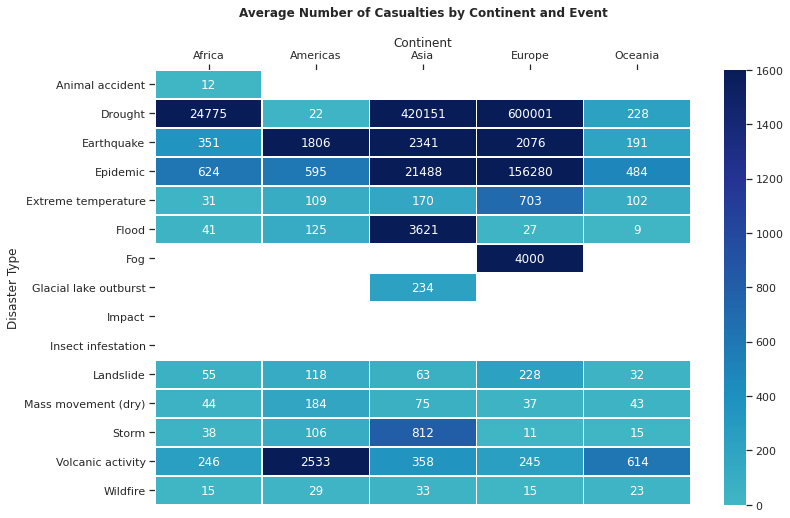

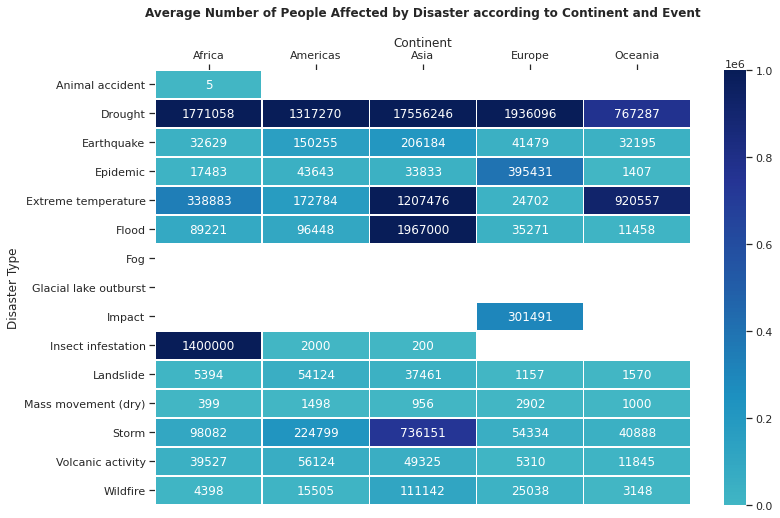

In [15]:
#Some Data Cleanse to extract Datetime from the Dataset.
#All of this to calculate the Duration of each event
nd_duration = nd.loc[:,['Start Year','Start Month','Start Day','End Year','End Month','End Day','Total Deaths','Total Affected','Continent','Disaster Type']]
nan_list = ['Start Year','Start Month','Start Day','End Year','End Month','End Day']

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
nd_duration[['Start Month','Start Day']] = imp.fit_transform(nd_duration[['Start Month','Start Day']])

EndMonthNulls_index = nd_duration[nd_duration['End Month'].isnull()].index.tolist()
EndDayNulls_index = nd_duration[nd_duration['End Day'].isnull()].index.tolist()

nd_duration.loc[EndMonthNulls_index,['End Month']] = nd_duration.loc[EndMonthNulls_index,['Start Month']].values    
nd_duration.loc[EndDayNulls_index,['End Day']] = nd_duration.loc[EndDayNulls_index,['Start Day']].values   

nd_duration = nd_duration.astype({'Start Year' : int,
                'Start Month': int,
                'Start Day': int,
                'End Year': int,
                'End Month': int,
                'End Day': int})

nd_duration['SdateInt']=nd_duration['Start Year'].astype(str) + nd_duration['Start Month'].astype(str).str.zfill(2)  + nd_duration['Start Day'].astype(str).str.zfill(2)
nd_duration['EdateInt']=nd_duration['End Year'].astype(str) + nd_duration['End Month'].astype(str).str.zfill(2)  + nd_duration['End Day'].astype(str).str.zfill(2)

nd_duration['SDate'] = pd.to_datetime(nd_duration['SdateInt'],format='%Y%m%d',errors='coerce')
nd_duration['EDate'] = pd.to_datetime(nd_duration['EdateInt'],format='%Y%m%d',errors='coerce')

nd_duration['Duration'] = nd_duration['EDate']  - nd_duration['SDate'] 

DisMonths = nd_duration.groupby('Start Month').size().reset_index()

#Data Cleanse
#This event had a "-150" days because the start and end month were probably mistaken
nd_duration.loc[12286,['Start Month']] = 1
#Drop rows that did not coverted to Datetime properly
nd_duration.dropna(subset=['Duration'], inplace = True)

#Transform Duration column in integer so we can compute the mean
nd_duration['Duration'] = nd_duration['Duration'].dt.days.astype('int16')
nd_duration = nd_duration.astype({'Duration' : int})
DisasterDuration = nd_duration.groupby(['Disaster Type', 'Continent'])[['Total Deaths','Total Affected','Duration']].agg('mean').reset_index()

heatmap(DisasterDuration, 'Disaster Type','Continent','Total Deaths',1600,'Average Number of Casualties by Continent and Event')
heatmap(DisasterDuration, 'Disaster Type','Continent','Total Affected',1e6,'Average Number of People Affected by Disaster according to Continent and Event')

* The Heatmaps display the AVERAGE number of affected people and casualties for each Natural Disaster Subtype
* Drought is highlighted as a major issue for most continents, especially if considering the Number of Affected. Only the Americas and Oceania do not report a high number of fatalities due to drought
* Asia is impacted by a diverse range of Natural Disasters, presenting high numbers of deaths and affected. The population density of this continent certainly plays a role, however, it is quite often that we hear on the news about floods, earthquakes and tsunamis in this region of the planet

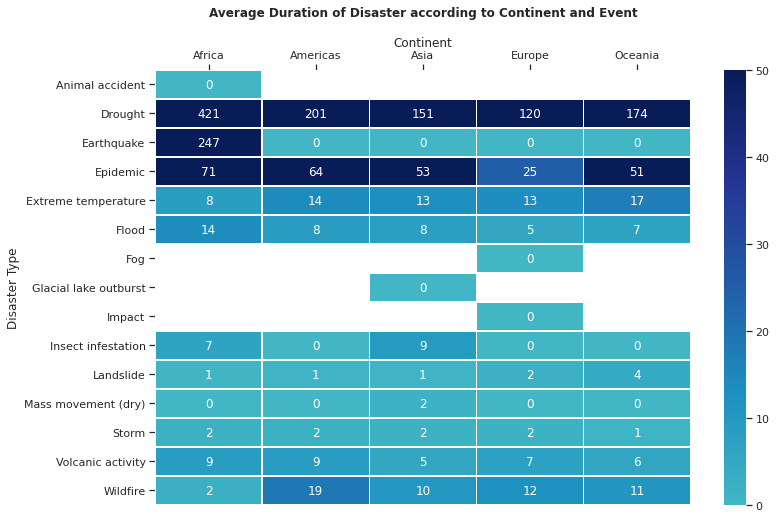

In [16]:
heatmap(DisasterDuration, 'Disaster Type','Continent','Duration',50,'Average Duration of Disaster according to Continent and Event')

* Drought is the event that has the longest duration across different Continents
* For some reason, floods in Africa last double the amount of days when compared to the remaining Continents
* In contrast, in Africa extreme temperature events have half the duration when compared to the Americas and other places. Africa is also showing an odd number of days for Earthquakes to last, which is probably a error in the Database input
* Wildfires in the Americas have a longer duration than any other place. It makes sense if we consider the fires in the US and Amazonia florest

# **5. Conclusion**

In this notebook we analysed the EM-DAT database of Natural Disasters. Containing almost fifty features and fifteen thousand entries, it is an interesting topic for a Data Analysis journey.

Climatological events, such as droughts, have shown to be one of the most common as well as the one that have caused more deaths. However, as we have well learned in past year, Biological disasters can also disrupt our lives and cause a significant number of casualties even if affects a reduced number of people in comparison.

The analysis is by far complete, as more information can be extracted. Let me know your ideas in the comments below and I hope to update this analysis shortly with more content.

If you found this useful, please consider upvote :)